In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\ranjeet walia\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
np.random.seed(42)

In [3]:
data = pd.read_csv('data.csv',sep=',',names=['x1','x2','y'])

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,x1,x2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [6]:
df.shape

(100, 3)

In [7]:
X = df[['x1','x2']]
Y = df['y']

In [8]:
blue_point = df.loc[df['y'] == 0.0]
len(blue_point)

50

In [9]:
red_point = df.loc[df['y'] == 1.0]
len(red_point)

50

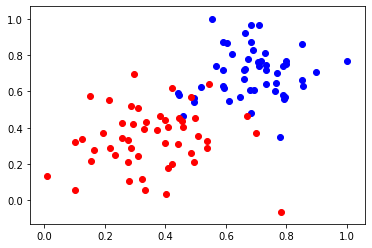

In [10]:
plt.scatter(blue_point['x1'], blue_point['x2'], color = 'blue', label = '0.0')
plt.scatter(red_point['x1'], red_point['x2'], color = 'red', label = '1.0')
plt.show()

In [11]:
X = np.array(X)
Y = np.array(Y)

In [12]:
X.shape

(100, 2)

In [13]:
Y.shape

(100,)

In [14]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [15]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [16]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [17]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [18]:
ans = trainPerceptronAlgorithm(X,Y)

In [21]:
ans

[(array([-0.05239463]), array([-2.04919443])),
 (array([1.23772563]), array([-2.90815949])),
 (array([-39.47663703]), array([23.57864461])),
 (array([-13.13237331]), array([7.06473087])),
 (array([-9.11612538]), array([4.57527519])),
 (array([-7.79056954]), array([3.96940892])),
 (array([-6.7750263]), array([3.50523881])),
 (array([-5.97212608]), array([3.13826056])),
 (array([-5.32141098]), array([2.84084093])),
 (array([-4.78335796]), array([2.59491529])),
 (array([-4.33103935]), array([2.38817591])),
 (array([-4.09146109]), array([2.3928177])),
 (array([-3.80251597]), array([2.25914697])),
 (array([-3.54414571]), array([2.13962066])),
 (array([-3.31174122]), array([2.03210655])),
 (array([-3.10157551]), array([1.93488045])),
 (array([-2.91060228]), array([1.84653311])),
 (array([-2.73630733]), array([1.76590142])),
 (array([-2.57659722]), array([1.69201691])),
 (array([-2.4297148]), array([1.6240667])),
 (array([-2.29417429]), array([1.56136344])),
 (array([-2.16871083]), array([1.5

In [22]:
len(ans)

25